# Bottle classification using mobilenet 


There are many pre-trained models which have been trained on millions of images from the ImageNet database with 1000 different classes which include Inception, ResNet, DenseNet to name a few. However, these models have a large number of parameters, which makes them heavy and unsuitable to be used in low computing and powered devices like Mobile phones.MobileNet was developed by Google’s research team specifically for mobiles, which have low memory and power requirements.

In this notebook we will build a classification model to classify input images as Large bottle , Small bottle and Non-bottle. 

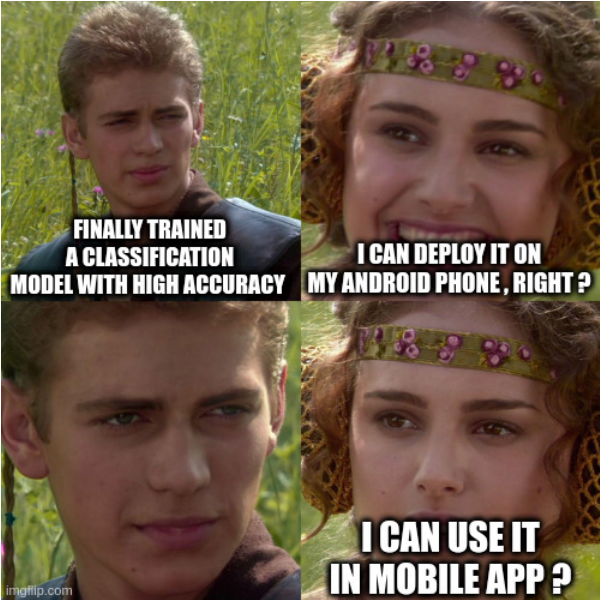


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from keras import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os


Function to get the names of all filesname in a directory

In [2]:
def getFilenames(directory):
    pth=[]
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            pth.append(os.path.join(dirpath, f))
    return pth

Getting the name of all Non-bottle , Large and small bottle files and creating a target variable for them. n represent nobottles , s  small bottles and l large bottles

In [3]:
path_no_bottles="/kaggle/input/bottles-dataset/data/Non Bottle"

No_bottles_filesname=getFilenames(path_no_bottles)
No_bottles_filesname.sort()
Getting the name of all Non-bottle , Large and small bottle files and creating a target variable for them. n represent nobottles , s  small bottles and l large bottles
targetn=[]
for i in range(len(No_bottles_filesname)):
    targetn.append('n')


In [4]:
path_small_bottles="/kaggle/input/bottles-dataset/data/Small"

Small_bottles_filesname=getFilenames(path_small_bottles)
Small_bottles_filesname.sort()

targets=[]
for i in range(len(Small_bottles_filesname)):
    targets.append('s')


In [5]:
path_large_bottles="/kaggle/input/bottles-dataset/data/Large"

large_bottles_filesname=getFilenames(path_large_bottles)
large_bottles_filesname.sort()

targetl=[]
for i in range(len(large_bottles_filesname)):
    targetl.append('l')

Combining input names and their respective targets 

In [6]:
target=targetn+targets+targetl
all_names=No_bottles_filesname+Small_bottles_filesname+large_bottles_filesname

### Dividing the data into training and testing 

In [7]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(all_names, target, test_size=0.2, random_state=1,stratify=target)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=y_train)

In [8]:
import pandas as pd
df_train=pd.DataFrame(columns=['Images','target'])
df_validate=pd.DataFrame(columns=['Images','target'])
df_test=pd.DataFrame(columns=['Images','target'])


In [9]:
df_train['Images']=X_train
df_train['target']=y_train


df_validate['Images']=X_val
df_validate['target']=y_val


df_test['Images']=X_test
df_test['target']=y_test

Checking the number of samples for each class in training dataset 

In [10]:
df_train['target'].value_counts()

s    19192
l     9781
n     4675
Name: target, dtype: int64

### Generator are use to load the images on the fly instead loading all the dataset in ram at once.

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=True,
  vertical_flip=True, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train,
        x_col="Images",
        y_col="target",
        target_size=(220, 220),
        batch_size=32,color_mode='rgb',
    
    
    
    
    
    
        class_mode='categorical')

Found 33648 validated image filenames belonging to 3 classes.


In [12]:
val_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=False,
  vertical_flip=False)

val_generator = val_datagen.flow_from_dataframe(
        dataframe=df_validate,
        x_col="Images",
        y_col="target",
        target_size=(220, 220),
        batch_size=32,color_mode='rgb',
        class_mode='categorical')



Found 8413 validated image filenames belonging to 3 classes.


In [13]:
test_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=False,
  vertical_flip=False)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=df_test,
        x_col="Images",
        y_col="target",
        target_size=(220, 220),
        batch_size=32,color_mode='rgb',
        class_mode='categorical')

Found 10516 validated image filenames belonging to 3 classes.


### Visualizing datset sample

In [14]:
import cv2
imagelarge=cv2.imread("/kaggle/input/bottles-dataset/data/Large/100.jpg")
imagesmall=cv2.imread("/kaggle/input/bottles-dataset/data/Small/0.jpg")
imagenon=cv2.imread("/kaggle/input/bottles-dataset/data/Non Bottle/no bottlesnobottle_1294.png")


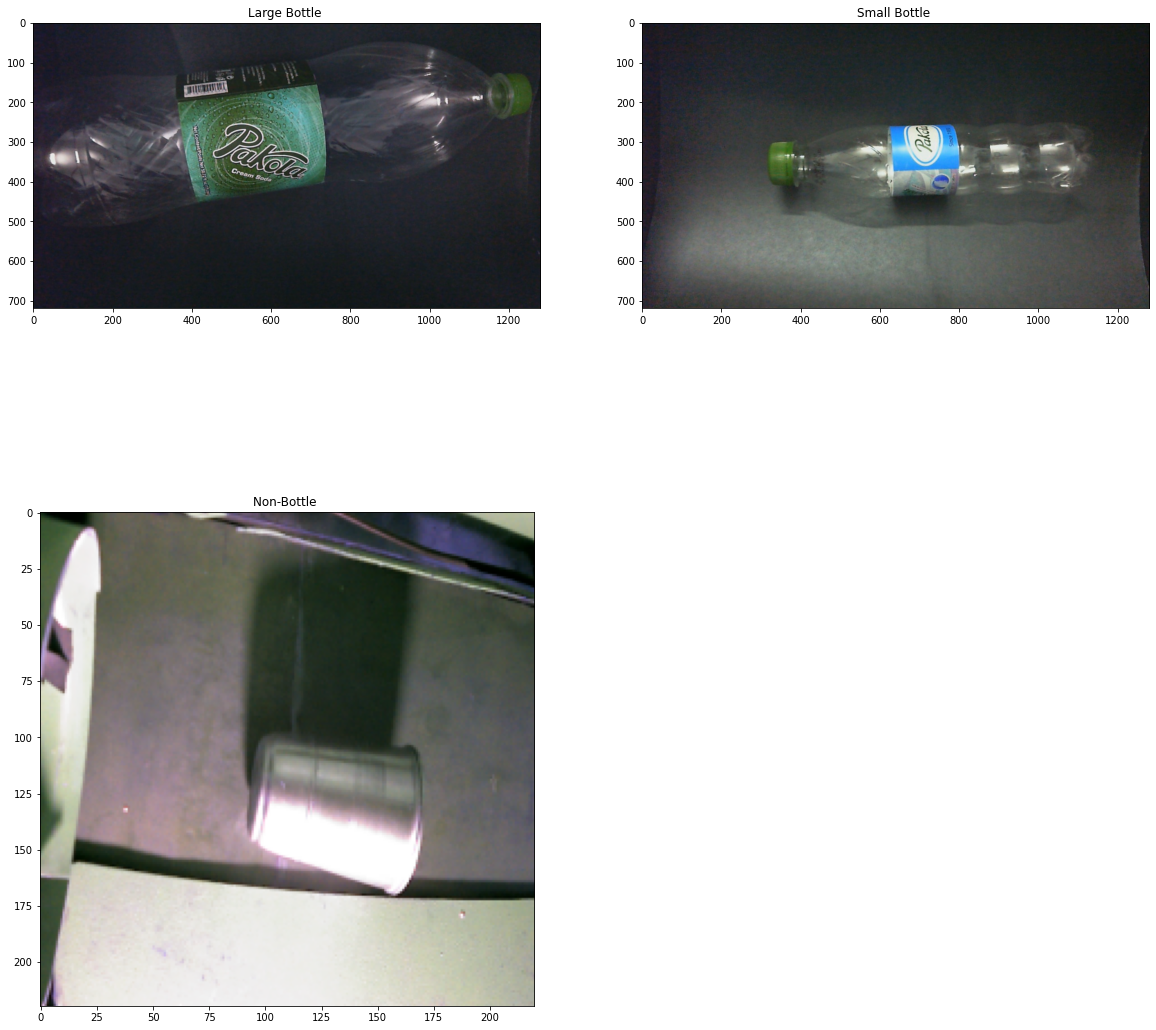

In [15]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)

ax1.title.set_text('Large Bottle ')



ax1.imshow(imagelarge)
ax2 = fig.add_subplot(2,2,2)
ax2.title.set_text('Small Bottle ')
ax2.imshow(imagesmall)
ax3 = fig.add_subplot(2,2,3)
ax3.title.set_text('Non-Bottle ')

ax3.imshow(imagenon)


In [16]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

In [17]:
IMG_SHAPE = (220,220,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='/kaggle/input/bottles-dataset/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5')


2022-12-08 07:41:58.610321: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 110, 110, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 110, 110, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 110, 110, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [20]:
for layer in model.layers:
    layer.trainable=False
# or if 
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [22]:
# training parameters
epochs = 3 # maximum number of epochs


### model checkpoint will be used to save the best model i.e model with highest validation accuracy

In [23]:
model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, verbose=1)

history = model.fit(train_generator, epochs=4,
                              validation_data=val_generator,  callbacks=[model_checkpoint])


2022-12-08 07:42:49.288763: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
1052/1052 [==============================] - 1851s 2s/step - loss: 0.1372 - categorical_accuracy: 0.9581 - val_loss: 8.0087 - val_categorical_accuracy: 0.6499

Epoch 00001: val_loss improved from inf to 8.00868, saving model to best_model.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/4
1052/1052 [==============================] - 1798s 2s/step - loss: 0.0612 - categorical_accuracy: 0.9813 - val_loss: 0.6728 - val_categorical_accuracy: 0.8929

Epoch 00002: val_loss improved from 8.00868 to 0.67276, saving model to best_model.h5
Epoch 3/4
1052/1052 [==============================] - 1795s 2s/step - loss: 0.0627 - categorical_accuracy: 0.9827 - val_loss: 1.9345 - val_categorical_accuracy: 0.8942

Epoch 00003: val_loss did not improve from 0.67276
Epoch 4/4
1052/1052 [==============================] - 1827s 2s/step - loss: 0.0405 - categorical_accuracy: 0.9881 - val_loss: 0.2590 - val_categorical_accuracy: 0.9286

Epoch 00004: val_loss improved from 0.67276 to 0.25899, saving model to best_model.h5


In [24]:
import time

# your code here    

start = time.process_time()

from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
img = Image.open('/kaggle/input/bottles-dataset/data/Non Bottle/no bottlesnobottle_1259.png')
img = img.resize((220,220), Image.ANTIALIAS)
imag=img_to_array(img)
imag/=255
predict=model.predict(imag[None,:])
yp=np.argmax(predict, axis=1)

print("Inference time for Mobile Net is ",time.process_time() - start)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  # This is added back by InteractiveShellApp.init_path()


Inference time for Mobile Net is  1.277039810000133
